In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [21]:
data = pd.read_csv('compresive_strength_concrete.csv')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [41]:
"""data.replace(0.0,np.nan, inplace=True)
dataset = data.fillna(method='ffill', axis = 1)"""
data = dataset.values
data.shape

(1030, 9)

In [37]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from tensorflow.keras.utils import to_categorical
#training variables
train_X = dataset.iloc[:515,:8] 
train_Y = dataset.iloc[:515,8:]
train_label = to_categorical(train_Y)
display(train_X.head())
display(train_Y.head())
# encoder = LabelEncoder()
# encoder.fit(dataset.iloc[:,8:])

# train_Y = encoder.transform(train_Y)
# display(train_Y)
train_label.shape

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,540.0,540.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,540.0,540.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,142.5,228.0,228.0,932.0,594.0,270.0
3,332.5,142.5,142.5,228.0,228.0,932.0,594.0,365.0
4,198.6,132.4,132.4,192.0,192.0,978.4,825.5,360.0


,"Concrete compressive strength(MPa, megapascals)"
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


(515, 83)

In [28]:
#validation variables
vali_X = dataset.iloc[816:,:8] 
vali_Y = dataset.iloc[816:,8:]
train_label = to_categorical(vali_Y)
display(vali_X.head())
display(vali_Y.head())


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
816,525.0,525.0,525.0,189.0,189.0,1125.0,613.0,7.0
817,525.0,525.0,525.0,189.0,189.0,1125.0,613.0,14.0
818,525.0,525.0,525.0,189.0,189.0,1125.0,613.0,28.0
819,525.0,525.0,525.0,189.0,189.0,1125.0,613.0,90.0
820,525.0,525.0,525.0,189.0,189.0,1125.0,613.0,270.0


,"Concrete compressive strength(MPa, megapascals)"
816,42.42
817,48.40
818,55.94
819,58.78
820,67.11


In [29]:
#test variables
test_X = dataset.iloc[516:815,:8] 
test_Y = dataset.iloc[516:815,8:]
test_label = to_categorical(test_Y)
display(test_X.head())
display(test_Y.head())



,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
516,202.0,11.0,141.0,206.0,1.7,942.0,801.0,3.0
517,202.0,11.0,141.0,206.0,1.7,942.0,801.0,7.0
518,202.0,11.0,141.0,206.0,1.7,942.0,801.0,56.0
519,284.0,15.0,141.0,179.0,5.5,842.0,801.0,28.0
520,284.0,15.0,141.0,179.0,5.5,842.0,801.0,3.0


,"Concrete compressive strength(MPa, megapascals)"
516,9.85
517,15.07
518,23.25
519,43.73
520,13.40


In [30]:
from tensorflow.keras import models
from tensorflow.keras import layers


model = models.Sequential()
model.add(layers.Dense(10, activation = 'relu', input_shape = (train_X.shape[1],))) # number of features (13) are used as vector in input shape
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1))
# model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])


In [31]:
epoch = 130
b_size= 4
history = model.fit(train_X, train_Y, epochs=epoch, batch_size=b_size, verbose=1)

Train on 515 samples
Epoch 1/130
515/515 [==============================] - 1s 1ms/sample - loss: 3329.7373 - mae: 35.8699
Epoch 2/130
515/515 [==============================] - 0s 419us/sample - loss: 320.3689 - mae: 14.4701
Epoch 3/130
515/515 [==============================] - 0s 441us/sample - loss: 263.1387 - mae: 13.1150
Epoch 4/130
515/515 [==============================] - 0s 421us/sample - loss: 230.2211 - mae: 12.2646
Epoch 5/130
515/515 [==============================] - 0s 396us/sample - loss: 204.0432 - mae: 11.6139
Epoch 6/130
515/515 [==============================] - 0s 394us/sample - loss: 187.8072 - mae: 11.2386
Epoch 7/130
515/515 [==============================] - 0s 427us/sample - loss: 178.7375 - mae: 10.9578
Epoch 8/130
515/515 [==============================] - 0s 390us/sample - loss: 173.2357 - mae: 10.7621
Epoch 9/130
515/515 [==============================] - 0s 400us/sample - loss: 170.0461 - mae: 10.5461
Epoch 10/130
515/515 [==============================]

515/515 [==============================] - 0s 454us/sample - loss: 92.5571 - mae: 7.6747
Epoch 80/130
515/515 [==============================] - 0s 472us/sample - loss: 92.9409 - mae: 7.7528
Epoch 81/130
515/515 [==============================] - 0s 431us/sample - loss: 90.8493 - mae: 7.4659
Epoch 82/130
515/515 [==============================] - 0s 441us/sample - loss: 90.7746 - mae: 7.6049
Epoch 83/130
515/515 [==============================] - 0s 419us/sample - loss: 89.4848 - mae: 7.6054
Epoch 84/130
515/515 [==============================] - 0s 427us/sample - loss: 87.2346 - mae: 7.4046
Epoch 85/130
515/515 [==============================] - 0s 404us/sample - loss: 87.2941 - mae: 7.4278
Epoch 86/130
515/515 [==============================] - 0s 411us/sample - loss: 88.1007 - mae: 7.5505
Epoch 87/130
515/515 [==============================] - 0s 384us/sample - loss: 85.0081 - mae: 7.2694
Epoch 88/130
515/515 [==============================] - 0s 392us/sample - loss: 81.9032 - mae: 

In [47]:
# test_model=models.Sequential()
# model.add(layers.Dense(10, activation = 'relu', input_shape = (train_X.shape[1],))) # number of features (13) are used as vector in input shape
# model.add(layers.Dense(8, activation = 'relu'))
# model.add(layers.Dense(1))
# model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
val_mse, val_mae = model.evaluate(vali_X, vali_Y, verbose = 0)

In [45]:
# t_epoch = 100
# t_b_size= 4
# history = model.fit(train_X, train_label, epochs=epoch, batch_size=b_size, verbose=1)

In [49]:
display(val_mae)

33.398396

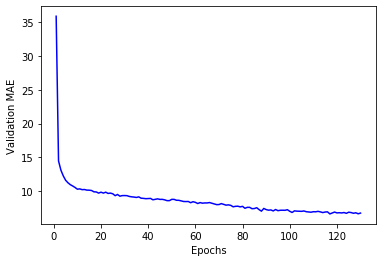

In [65]:
history_dict = history.history
acc = history.history['mae']
epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc,'b')

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()
